내용: 모의고사3-2 (p399)  
일시: 21.09.05(일)

Reference 
* https://shiningyouandme.tistory.com/39?category=807628 #윤이나영
* https://bcho.tistory.com/1203 # 조대협의 블로그 
* https://github.com/H2O-500ml/ADP  #H20

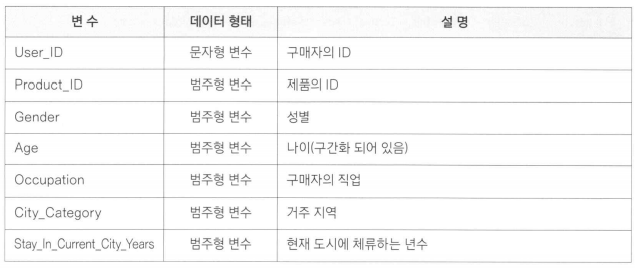

### 문제1
"BlackFriday"데이터에서 Product_Category_2, Product_Category_3의 NA값을 0값으로
대체하고 Product_Category_1,2,3 변수의 값을 다 더한 Product_all 변수를 생성하여 추가하라.

그리고 User_ID를 charecter변수로, Occupation, Marital_Status Product_Category_1,  Product_Category_2, Product_Category_3 변수를 범주형 변수로 변환하시오.

마지막으로 범주형 변수인 Gender, Age, City_Category, tay_In_Current_City_Years를 더미변수로 변환해서 BlackFriday데이터에 추가하시오.

1.1 NA 0처리.  
- Product_Category_2
- Product_Category_3

1.2 Product_all 생성.  
- Product_Category_1,2,3 합

1.3 User_ID를 charecter변수로 변경.
1.4 아래 변수를 범주형변수로 변환  
- Occupation
- Marital_Status
- Product_Category_1 
- Product_Category_2
- Product_Category_3
1.5 아래 범주형 변수를 더미변수로 변환해서 BlackFriday데이터에 추가    
- Gender
- Age
- City_Category

### 문제2 
1)에서 전처리가 완료된 데이터에서 User_ID, Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years, Product_all 변수를 제외한 나머지 변수들을 활용하여 kmeans군집분석을 수행하고 해석하시오.
(범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오.) 

그리고 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오. 
    
2.1 아래 변수를 제외하고, kmeans 군집분석을 수행하고 해석하시오.  
(범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오) 
- User_ID
- Product_ID
- Gender 
- Age
- City_Category
- Stay_In_Current_City_Years
- Product_all 

2.2 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오. 

### Init




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!python --version

Python 3.7.11


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = './drive/MyDrive/adp/edu/data/BlackFriday.csv'

In [ ]:
df = pd.read_csv(path)

**EDA**

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(537577, 12)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [ ]:
df.describe()  # r, summary

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


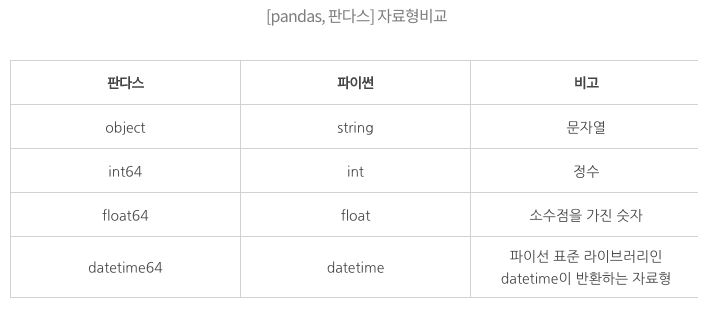

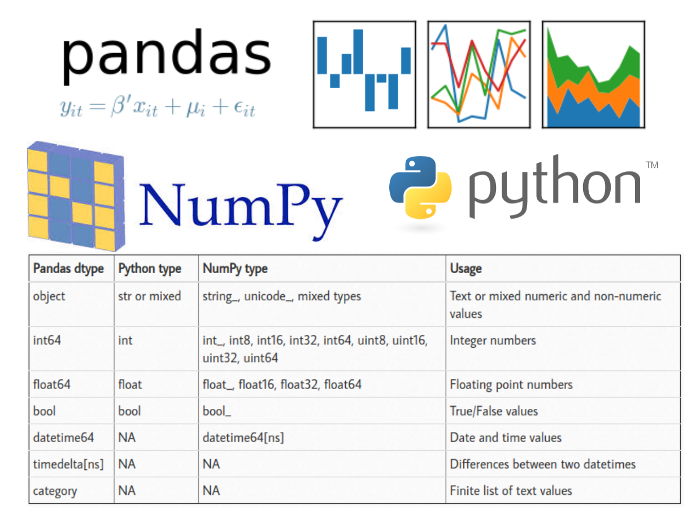

In [ ]:
df.info()  # 컬럼별 Data 갯수/Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
df.City_Category.value_counts()  # value_counts: 지정행 값 종류별 누적갯수

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [ ]:
df['Gender'].unique()  # 지정행 값종류

array(['F', 'M'], dtype=object)

1.1 NA 0처리.  
- Product_Category_2
- Product_Category_3 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.isnull().sum()  #컬럼별 null(NaN) 합계

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)

In [ ]:
df.isnull().sum()  #컬럼별 null(NaN) 합계

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

1.2 Product_all 생성.  
- Product_all = Product_Category_1,2,3 합



In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370


In [ ]:
df['Product_all'] = df['Product_Category_1']+df['Product_Category_2']+df['Product_Category_3']

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0


1.3 User_ID를 charecter변수로 변경.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Product_all                 537577 non-null  float64
dtypes: float64(3),

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0


In [ ]:
print( type(df['User_ID'][0]) )
print( df['User_ID'][0] )

<class 'numpy.int64'>
1000001


In [ ]:
df['User_ID'] = df['User_ID'].astype('str')  # 형변환(int64->string)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  object 
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Product_all                 537577 non-null  float64
dtypes: float64(3),

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0


In [ ]:
print( type(df['User_ID'][0]) )
print( df['User_ID'][0] )

<class 'str'>
1000001


1.4 아래 변수를 범주형변수로 변환  
- Occupation(아큐)
- Marital_Status(머티)
- Product_Category_1 
- Product_Category_2
- Product_Category_3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  object 
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
 12  Product_all                 537577 non-null  float64
dtypes: float64(3),

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0


In [ ]:
df['Occupation']         = df['Occupation'].astype('category')
df['Marital_Status']     = df['Marital_Status'].astype('category')
df['Product_Category_1'] = df['Product_Category_1'].astype('category')
df['Product_Category_2'] = df['Product_Category_2'].astype('category')
df['Product_Category_3'] = df['Product_Category_3'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  object  
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  object  
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  category
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  category
 8   Product_Category_1          537577 non-null  category
 9   Product_Category_2          537577 non-null  category
 10  Product_Category_3          537577 non-null  category
 11  Purchase                    537577 non-null  int64   
 12  Product_all                 537577 non-null  float64 
dtyp

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0


1.5 아래 범주형 변수를 더미변수로 변환해서 BlackFriday데이터에 추가    
- Gender
- Age
- City_Category
- 





In [ ]:
print( df.Gender.unique() )
print( df.Age.unique() )
print( df.City_Category.unique() )
print( df.Stay_In_Current_City_Years.unique() )

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     537577 non-null  object  
 1   Product_ID                  537577 non-null  object  
 2   Gender                      537577 non-null  object  
 3   Age                         537577 non-null  object  
 4   Occupation                  537577 non-null  category
 5   City_Category               537577 non-null  object  
 6   Stay_In_Current_City_Years  537577 non-null  object  
 7   Marital_Status              537577 non-null  category
 8   Product_Category_1          537577 non-null  category
 9   Product_Category_2          537577 non-null  category
 10  Product_Category_3          537577 non-null  category
 11  Purchase                    537577 non-null  int64   
 12  Product_all                 537577 non-null  float64 
dtyp

In [ ]:
print( df.Gender.unique() )
print( df.Age.unique() )
print( df.City_Category.unique() )
print( df.Stay_In_Current_City_Years.unique() )

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


In [ ]:
df.shape

(537577, 13)

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0


In [ ]:
df['GenderDummy'] = df['Gender'].copy()
df['GenderDummy'] = pd.get_dummies(df['GenderDummy'])

df['AgeDummy'] = df['Age'].copy()
df['AgeDummy'] = pd.get_dummies(df['AgeDummy'])

df['City_CategoryDummy'] = df['City_Category'].copy()
df['City_CategoryDummy'] = pd.get_dummies(df['City_CategoryDummy'])

df['Stay_In_Current_City_YearsDummy'] =  df['Stay_In_Current_City_Years'].copy()
df['Stay_In_Current_City_YearsDummy'] = pd.get_dummies(df['Stay_In_Current_City_YearsDummy'])

In [ ]:

df['AgeDummy'] = pd.get_dummies(df['Age'])
df['City_CategoryDummy'] = pd.get_dummies(df['City_Category'])
df['Stay_In_Current_City_YearsDummy'] = pd.get_dummies(df['Stay_In_Current_City_Years'])

2.1 아래 변수를 제외하고, kmeans 군집분석을 수행하고 해석하시오.  
(범주형 변수는 수치형 변수로 변환하여 분석에 활용하시오) 
- User_ID
- Product_ID
- Gender 
- Age
- City_Category
- Stay_In_Current_City_Years
- Product_all 


In [ ]:
drop_list = [ 'User_ID','Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years','Product_all']
drop_list

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Product_all']

In [ ]:
dfk = df.drop(drop_list, axis=1)
dfk.shape

(537577, 10)

In [ ]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Occupation                       537577 non-null  category
 1   Marital_Status                   537577 non-null  category
 2   Product_Category_1               537577 non-null  category
 3   Product_Category_2               537577 non-null  category
 4   Product_Category_3               537577 non-null  category
 5   Purchase                         537577 non-null  int64   
 6   GenderDummy                      537577 non-null  uint8   
 7   AgeDummy                         537577 non-null  uint8   
 8   City_CategoryDummy               537577 non-null  uint8   
 9   Stay_In_Current_City_YearsDummy  537577 non-null  uint8   
dtypes: category(5), int64(1), uint8(4)
memory usage: 8.7 MB


In [ ]:
# 군집분석을 위해 형변환 (category -> float or int)
dfk['Occupation'] = dfk['Occupation'].astype('float')
dfk['Marital_Status'] = dfk['Marital_Status'].astype('float')
dfk['Product_Category_1'] = dfk['Product_Category_1'].astype('float')
dfk['Product_Category_2'] = dfk['Product_Category_2'].astype('float')
dfk['Product_Category_3'] = dfk['Product_Category_3'].astype('float')

In [ ]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Occupation                       537577 non-null  float64
 1   Marital_Status                   537577 non-null  float64
 2   Product_Category_1               537577 non-null  float64
 3   Product_Category_2               537577 non-null  float64
 4   Product_Category_3               537577 non-null  float64
 5   Purchase                         537577 non-null  int64  
 6   GenderDummy                      537577 non-null  uint8  
 7   AgeDummy                         537577 non-null  uint8  
 8   City_CategoryDummy               537577 non-null  uint8  
 9   Stay_In_Current_City_YearsDummy  537577 non-null  uint8  
dtypes: float64(5), int64(1), uint8(4)
memory usage: 26.7 MB


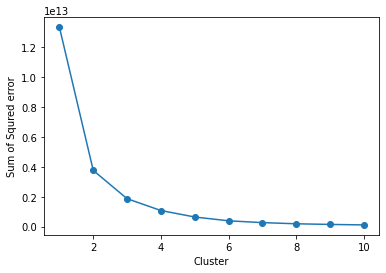

In [ ]:
def elbow(x):  # sse (sum of squared error)
    sse_list = [] # list for sse 
    for i in range(1, 11):  # cluster: 1~10
        km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
        km.fit(x)
        sse_list.append(km.inertia_)  # inertia_: sum of squqred error 
    plt.plot(range(1, 11), sse_list, marker = "o")
    plt.xlabel("Cluster")
    plt.ylabel("Sum of Squred error")
    plt.show()
    
elbow(dfk)

Inertia_
- 군집의 응집도를 나타내는 값 (작을 수록 군집화가 잘되었다고 평가)
- 군집 내 각 중심점에서 군집의 데이타간의 거리를 합산

최적의 군집갯수설정
- Sum of squqred error 그래프에서 곡선이 급격히 감소하는 지점
- 위 결과에서 3~4개가 적절 (3으로 확정)


In [ ]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(dfk)
pred=km.fit_predict(dfk)
df['clust']=pred

In [ ]:
df.shape

(537577, 18)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_all,GenderDummy,AgeDummy,City_CategoryDummy,Stay_In_Current_City_YearsDummy,clust
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,3.0,1,1,1,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,21.0,1,1,1,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,12.0,1,1,1,0,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,26.0,1,1,1,0,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,8.0,0,0,0,0,0



2.2 최적의 군집 개수를 찾아서 만일 군집 개수가 이전 결과와 다르면 분석을 다시 수행하여 해석하시오.



In [ ]:
#Female 보다 Men이 약 3~4배 정도 차이가 났다. 
df.groupby(['clust','Gender']).size().unstack()

Gender,F,M
clust,,
0,64840,187843
1,23933,95335
2,43424,122202


In [ ]:
#연령대를 확인해본 결과 26~35대가 가장 많았다. 
df.groupby(['clust','Age']).size().unstack() 

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
clust,,,,,,,
0,6716,44866,100092,50610,21355,18392,10652
1,3133,21505,47432,24345,9549,8799,4505
2,4858,31263,67166,32544,13622,10427,5746


In [ ]:
#2번째 집단이 가장 구매가 크다. 
df.groupby(['clust'])['Purchase'].mean()

clust
0     9043.804288
1    17054.765360
2     4216.518083
Name: Purchase, dtype: float64

In [ ]:
#51~55세 연령이 가장 구매가 크다. 
df['Purchase'].groupby(df['Age']).mean()

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64